In [1]:
import os
import json

import matplotlib.pyplot as plt

# 需要画的东西
+ 温度T和pass@k的关系（标准蒸馏，三种模型都要画）
+ 我们的蒸馏方法过程中各种指标的变动（只画codet5p）
+ 原始蒸馏函数各种指标变动（只画codet5p，和我们的蒸馏方法对比，体现我们的方法的稳定性和优越性）
+ 我们的蒸馏方法超参数变动导致的各种指标变动
+ 生成代码长度和pass@1的关系（只画codet5p，原始codet5p和蒸馏后的codet5p都要有）

In [2]:
# 温度T和pass@1的关系
filename_TP = os.path.join("standard", "codet5p.jsonl")

In [3]:
def draw_TP(filename):
    T_list = []
    P1_list = []
    P10_list = []
    with open(filename, "r") as f:
        for line in f:
            json_obj = json.loads(line)
            T_list.append(str(json_obj["T"]))
            P1_list.append(json_obj["P1"])
            P10_list.append(json_obj["P10"])
    plt.title("codetp5")
    plt.xlabel("T")
    plt.ylabel("pass@1")
    plt.bar(T_list, P1_list, width=0.5)
    # plt.bar(T_list, P10_list)
    plt.show()

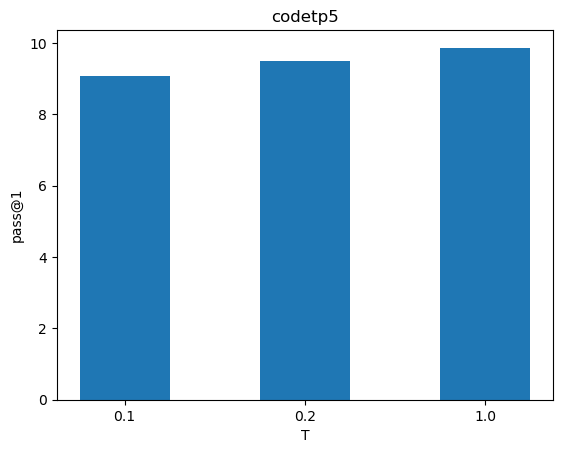

In [4]:
draw_TP(filename_TP)

In [2]:
def draw_variation(filename):
    path = os.path.join("codet5p-peft", "feedback", filename)
    """
    模型蒸馏过程中一些指标的变动, 折线图
    """
    epochs = []
    T_list = []
    Q_list = []
    S_list = []
    C_list = []
    with open(path, "r") as f:
        for line in f:
            json_obj = json.loads(line)
            epochs.append(int(json_obj["id"]))
            T_list.append(json_obj["T"])
            Q_list.append(json_obj["Q"])
            S_list.append(json_obj["Success Rate"] * 100)
            C_list.append(json_obj["Compile Rate"] * 100)

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot(epochs, T_list)
    plt.xticks(epochs)
    plt.xlabel("epochs")
    plt.ylabel("T")

    plt.subplot(2, 2, 2)
    plt.plot(epochs, Q_list, c="green")
    plt.xticks(epochs)
    plt.xlabel("epochs")
    plt.ylabel("Q")

    plt.subplot(2, 2, 3)
    plt.plot(epochs, S_list, c="purple")
    plt.xticks(epochs)
    plt.xlabel("epochs")
    plt.ylabel("Success Rate (%)")

    plt.subplot(2, 2, 4)
    plt.plot(epochs, C_list, c="orange")
    plt.xticks(epochs)
    plt.xlabel("epochs")
    plt.ylabel("Compile Rate (%)")

    plt.suptitle("The effect of T on distillation for codet5p-220m", fontsize=16)
    plt.show()

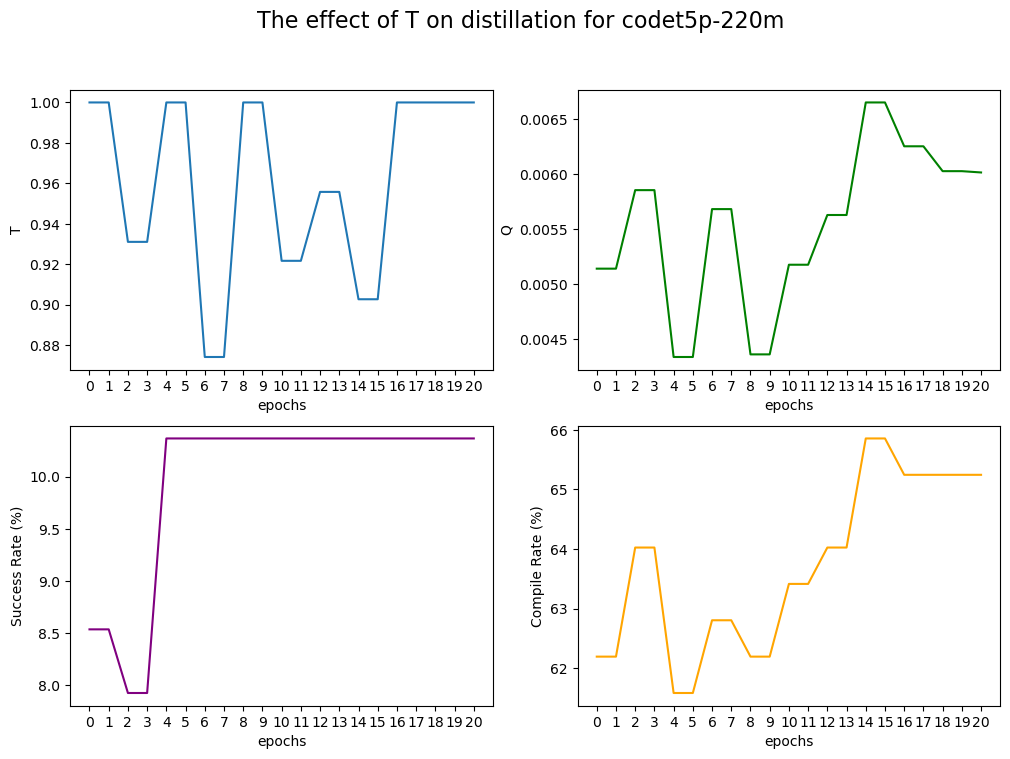

In [3]:
draw_variation("values.jsonl")

In [4]:
def draw_origin_variation(filename):
    path = os.path.join("codet5p-peft", "ablation", filename)
    """
    模型蒸馏过程中一些指标的变动, 折线图
    """
    epochs = []
    T_list = []
    Q_list = []
    S_list = []
    C_list = []
    L_list = []
    with open(path, "r") as f:
        for line in f:
            json_obj = json.loads(line)
            epochs.append(json_obj["id"])
            T_list.append(json_obj["T"])
            Q_list.append(json_obj["Q"])
            S_list.append(json_obj["Success Rate"] * 100)
            C_list.append(json_obj["Compile Rate"] * 100)
            L_list.append(json_obj["Loss"])

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs[2:], L_list[2:])
    plt.xticks(epochs[2:])
    plt.xlabel("epochs")
    plt.ylabel("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(epochs[2:], S_list[2:], c="red")
    plt.xticks(epochs[2:])
    plt.xlabel("epochs")
    plt.ylabel("Success Rate (%)")

    plt.suptitle("The relationship between Loss and Success Rate under standard distillation", fontsize=16)
    plt.show()

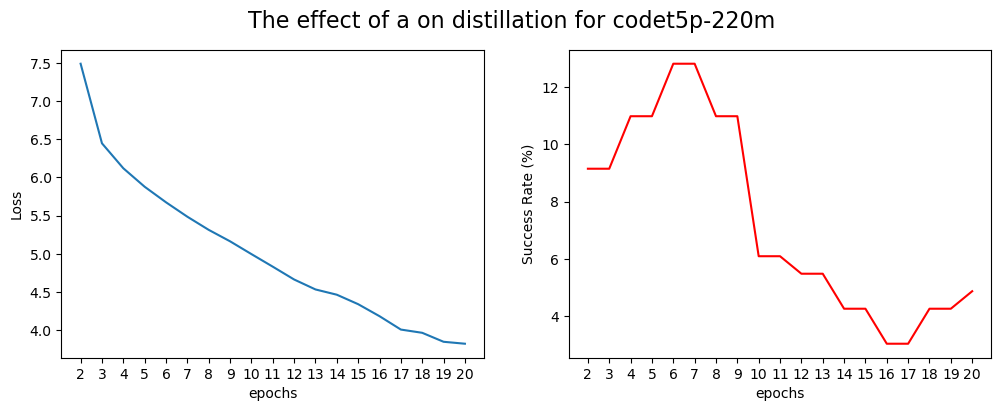

In [5]:
draw_origin_variation("values_a_100.jsonl")

In [18]:
def draw_compared_variation(filename1, filename2, filename3):
    path = os.path.join("codet5p-peft", "feedback", filename1)
    path_standard = os.path.join("codet5p-peft", "cross", filename2)
    path_persd = os.path.join("codet5p-peft", "PERsD", filename3)
    """
    模型蒸馏过程中一些指标的变动, 折线图, 和标准蒸馏比较
    """


    epochs = []
    T_list = []
    Q_list = []
    S_list = []
    C_list = []
    with open(path, "r") as f:
        for line in f:
            json_obj = json.loads(line)
            epochs.append(int(json_obj["id"]))
            T_list.append(json_obj["T"])
            Q_list.append(json_obj["Q"])
            S_list.append(json_obj["Success Rate"] * 100)
            C_list.append(json_obj["Compile Rate"] * 100)

    T_list_standard = [1.0 for _ in range(len(T_list))]
    Q_list_standard = []
    S_list_standard = []
    C_list_standard = []

    with open(path_standard, "r") as f:
        for line in f:
            json_obj = json.loads(line)
            Q_list_standard.append(json_obj["Q"])
            S_list_standard.append(json_obj["Success Rate"] * 100)
            C_list_standard.append(json_obj["Compile Rate"] * 100)

    T_list_persd = [1.0 for _ in range(len(T_list))]
    Q_list_persd = []
    S_list_persd = []
    C_list_persd = []

    with open(path_persd, "r") as f:
        for line in f:
            json_obj = json.loads(line)
            Q_list_persd.append(json_obj["Q"])
            S_list_persd.append(json_obj["Success Rate"] * 100)
            C_list_persd.append(json_obj["Compile Rate"] * 100)

    detq = Q_list[0] - Q_list_persd[0]
    for i in range(len(Q_list_persd)):
        Q_list_persd[i] += detq

    plt.figure(figsize=(12, 8))
    # T值变化
    plt.subplot(2, 2, 1)
    plt.plot(epochs, T_list, label="ours")
    plt.plot(epochs, T_list_standard, linestyle="--", label="standard")
    plt.plot(epochs, T_list_persd, linestyle="dotted", label="PERsD")
    plt.xticks(epochs)
    plt.xlabel("epochs")
    plt.ylabel("T")
    plt.legend(loc="lower left")

    plt.subplot(2, 2, 2)
    plt.plot(epochs, Q_list, label="ours")
    plt.plot(epochs, Q_list_standard, linestyle="--", label="standard")
    plt.plot(epochs, Q_list_persd, linestyle="--", label="PERsD")
    plt.xticks(epochs)
    plt.xlabel("epochs")
    plt.ylabel("Q")
    plt.legend(loc="lower left")

    plt.subplot(2, 2, 3)
    plt.plot(epochs, S_list, label="ours")
    plt.plot(epochs, S_list_standard, linestyle="--", label="standard")
    plt.plot(epochs, S_list_persd, linestyle="--", label="PERsD")
    plt.xticks(epochs)
    plt.xlabel("epochs")
    plt.ylabel("Success Rate (%)")
    plt.legend(loc="lower left")

    plt.subplot(2, 2, 4)
    plt.plot(epochs, C_list, label="ours")
    plt.plot(epochs, C_list_standard, linestyle="--", label="standard")
    plt.plot(epochs, C_list_persd, linestyle="--", label="PERsD")
    plt.xticks(epochs)
    plt.xlabel("epochs")
    plt.ylabel("Compile Rate (%)")
    plt.legend(loc="lower left")

    plt.suptitle("Comparison of our distillation method with other distillation methods", fontsize=16)
    plt.show()

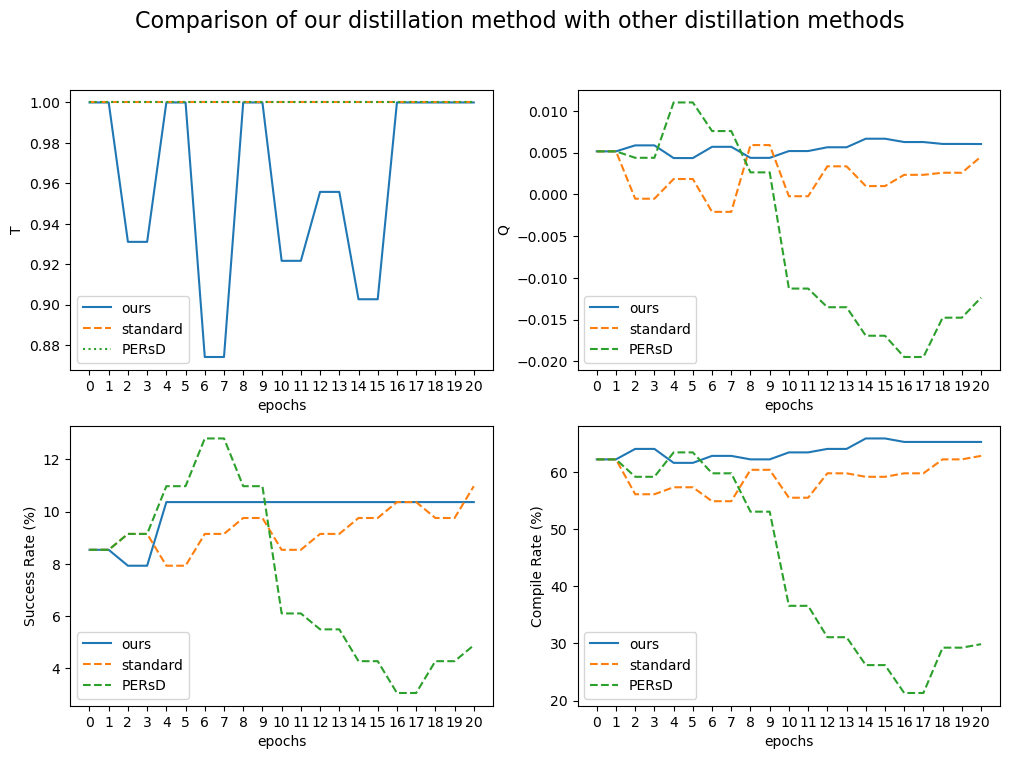

In [19]:
draw_compared_variation("values.jsonl", "values.jsonl", "values.jsonl")

In [9]:
def draw_variation_parameters(filename):
    path = os.path.join("codet5p-peft", "ablation", filename)
    """
    模型蒸馏过程中一些指标的变动, 折线图
    """
    epochs = []
    T_list = []
    Q_list = []
    S_list = []
    C_list = []
    with open(path, "r") as f:
        for line in f:
            json_obj = json.loads(line)
            epochs.append(int(json_obj["id"]))
            T_list.append(json_obj["T"])
            Q_list.append(json_obj["Q"])
            S_list.append(json_obj["Success Rate"] * 100)
            C_list.append(json_obj["Compile Rate"] * 100)
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    ax[0][0].set_title("T")
    ax[0][0].plot(epochs, T_list)

    ax[0][1].set_title("Q")
    ax[0][1].plot(epochs, Q_list)

    ax[1][0].set_title("Success Rate")
    ax[1][0].plot(epochs, S_list)

    ax[1][1].set_title("Compile Rate")
    ax[1][1].plot(epochs, C_list)
    plt.show()

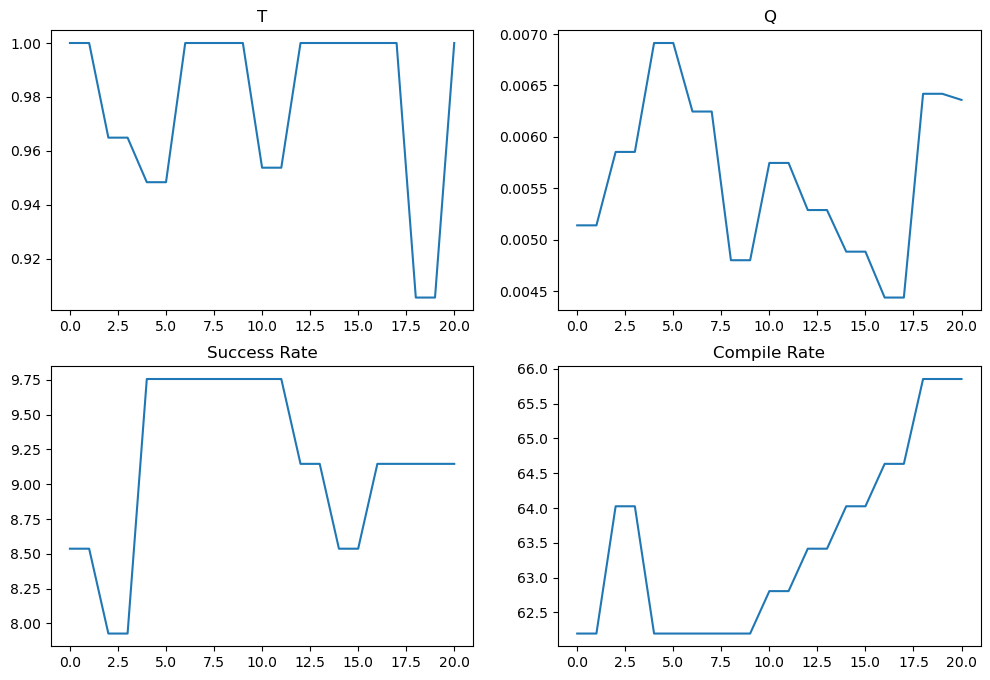

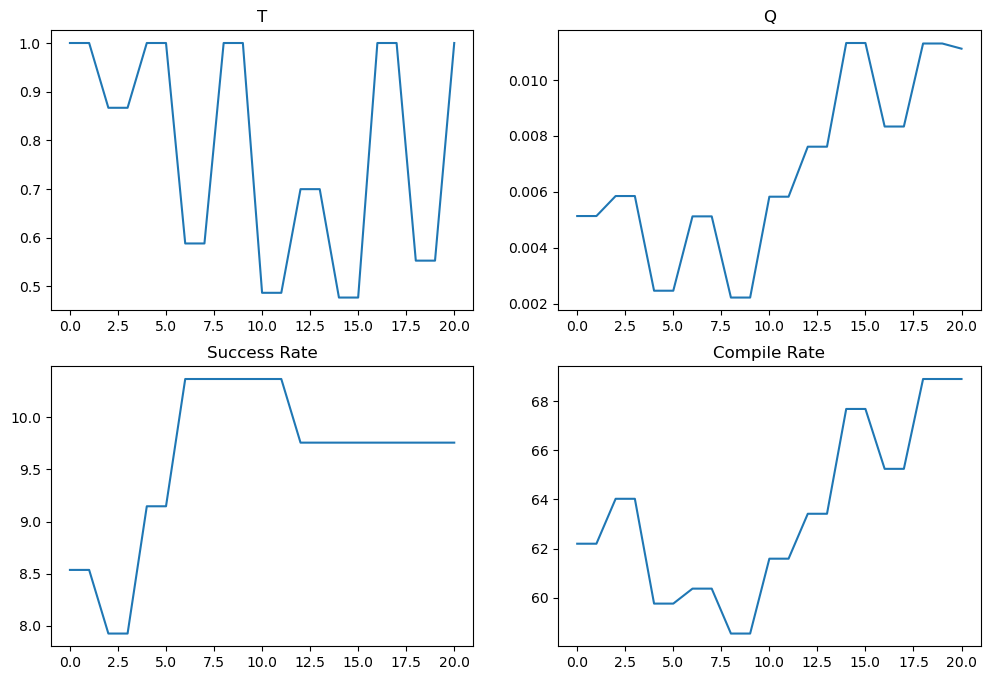

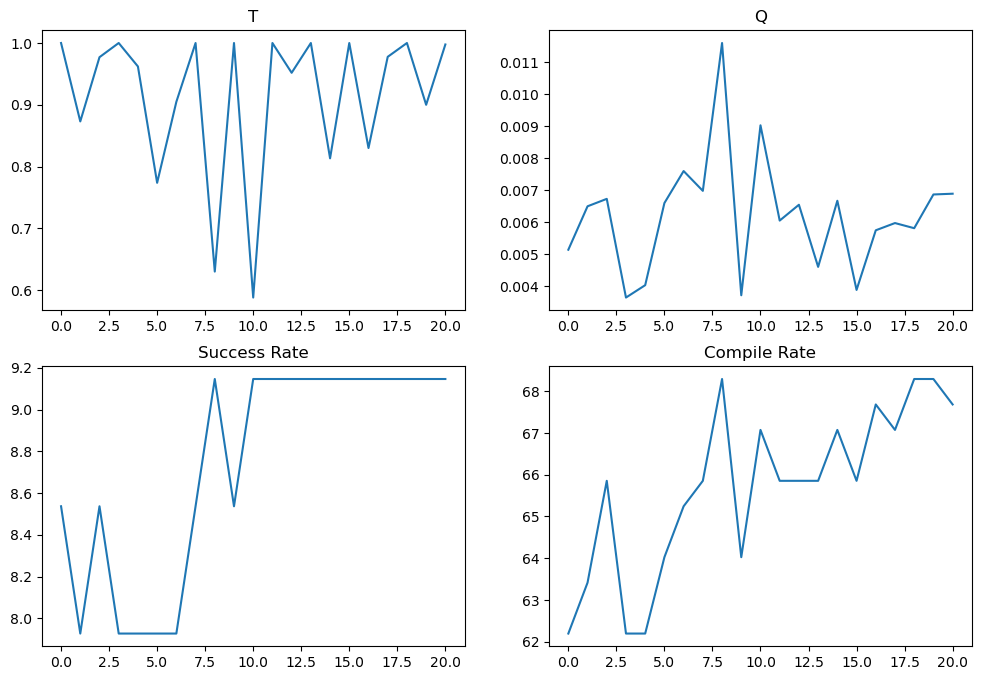

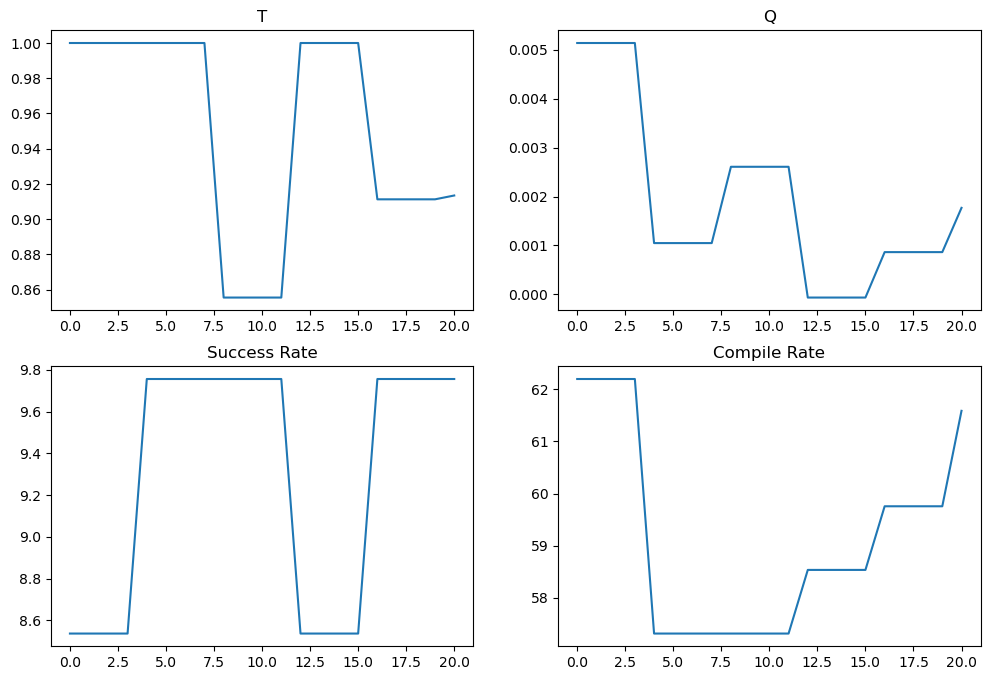

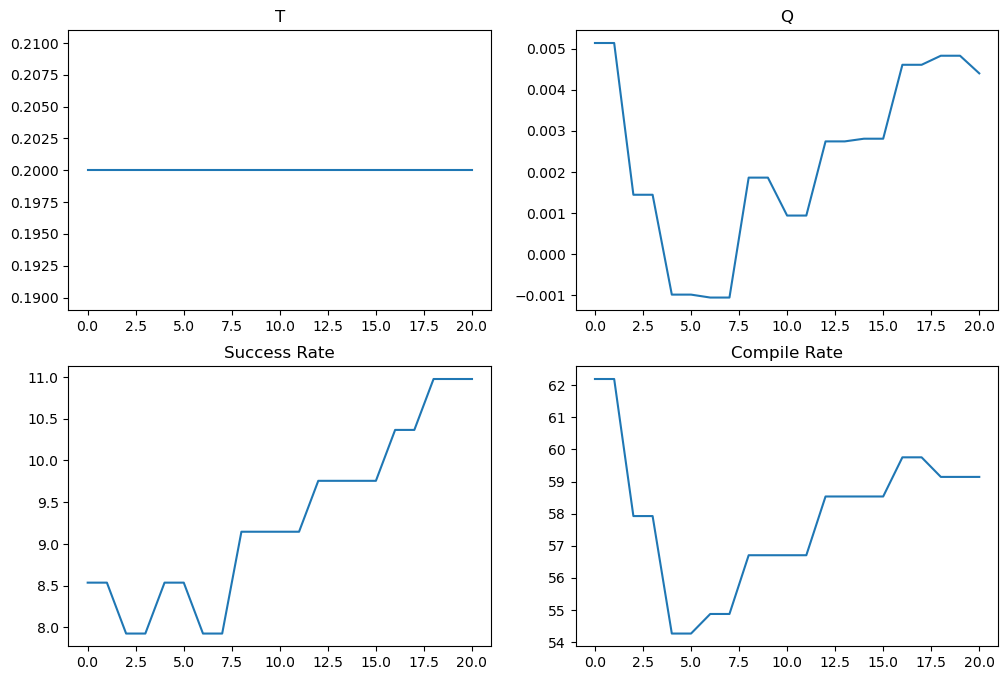

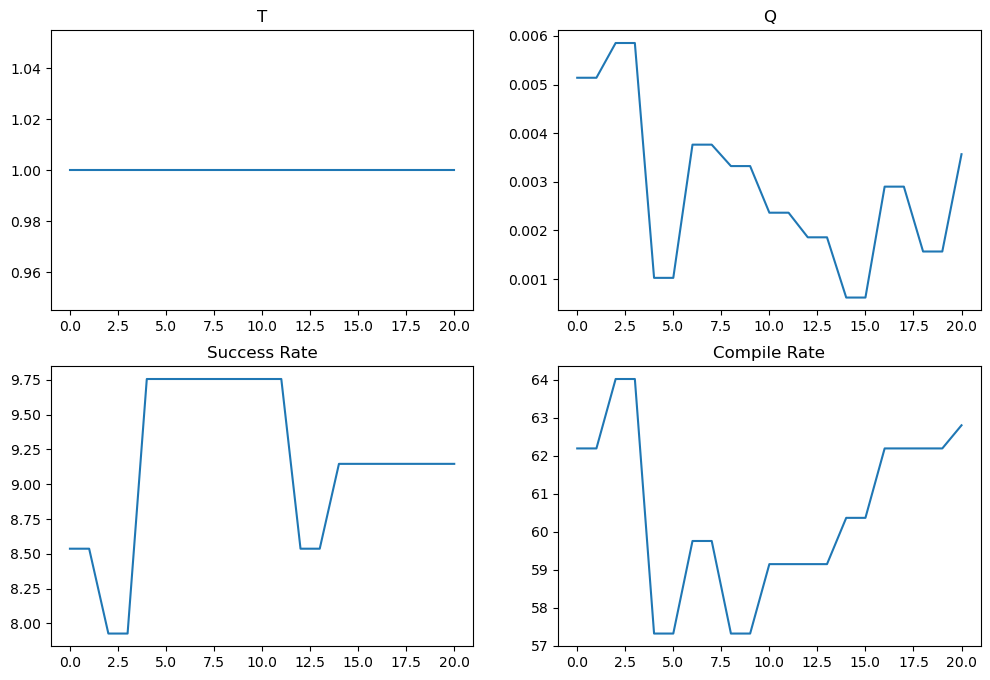

In [11]:
filenames = ["values_beta50.jsonl", "values_beta200.jsonl", "values_step1.jsonl", "values_step4.jsonl", "values_T20.jsonl", "values_T100.jsonl"]
for filename in filenames:
    draw_variation_parameters(filename)